<a href="https://colab.research.google.com/github/angelMeela/ML-projects/blob/main/industrial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Design a mini project for predictive maintenance of industrial equipment using machine learning and big data tools, based on the provided report and the dataset at "/content/equipment_anomaly_data.csv".

## Set up environment

### Subtask:
Install necessary libraries for PySpark and data handling.


**Reasoning**:
The subtask requires installing three libraries: `pyspark`, `findspark`, and `pandas`. These can be installed using `pip` in a single code block.



In [1]:
%pip install pyspark findspark pandas

## Load and inspect data

### Subtask:
Load the provided CSV data into a Spark DataFrame and perform initial inspection.


**Reasoning**:
Import SparkSession, create a SparkSession, load the data, display the schema, show the first few rows, and print the number of rows to perform initial inspection of the data.



In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("EquipmentAnomalyDetection").getOrCreate()

df = spark.read.csv("/content/equipment_anomaly_data.csv", header=True, inferSchema=True)

df.printSchema()

df.show(5)

print(f"Number of rows: {df.count()}")

root
 |-- temperature: double (nullable = true)
 |-- pressure: double (nullable = true)
 |-- vibration: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- equipment: string (nullable = true)
 |-- location: string (nullable = true)
 |-- faulty: double (nullable = true)

+-----------------+-----------------+-------------------+------------------+----------+-------------+------+
|      temperature|         pressure|          vibration|          humidity| equipment|     location|faulty|
+-----------------+-----------------+-------------------+------------------+----------+-------------+------+
|58.18018003931781|25.02927765103301| 0.6065162172245139|45.694907104076414|   Turbine|      Atlanta|   0.0|
|75.74071220894001|22.95401759548667| 2.3380947537510077|41.867406792614915|Compressor|      Chicago|   0.0|
|71.35859424081657|27.27683031893662| 1.3891983049086754| 58.95440890948324|   Turbine|San Francisco|   0.0|
|71.61698526704753|32.24292130393475| 1.7706896863176191|

## Feature engineering

### Subtask:
Prepare the data for the ML model by creating relevant features from the sensor data.


**Reasoning**:
Select the relevant numerical features, assemble them into a single vector column, and keep the 'faulty' column to create the new DataFrame for the ML model.



In [3]:
from pyspark.ml.feature import VectorAssembler

feature_columns = ['temperature', 'pressure', 'vibration', 'humidity']

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

assembled_df = assembler.transform(df)

model_df = assembled_df.select("features", "faulty")

model_df.show(5)

+--------------------+------+
|            features|faulty|
+--------------------+------+
|[58.1801800393178...|   0.0|
|[75.7407122089400...|   0.0|
|[71.3585942408165...|   0.0|
|[71.6169852670475...|   0.0|
|[66.5068320388180...|   0.0|
+--------------------+------+
only showing top 5 rows



## Model selection and training

### Subtask:
Choose an appropriate ML model for anomaly detection or failure prediction and train it on the prepared data.


**Reasoning**:
Import the RandomForestClassifier, instantiate it, and train the model on the prepared data.



In [4]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol="faulty", featuresCol="features")

rf_model = rf.fit(model_df)

## Model evaluation

### Subtask:
Evaluate the performance of the trained model using suitable metrics.


**Reasoning**:
Evaluate the performance of the trained Random Forest model using relevant classification metrics on the model_df DataFrame.



In [5]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

predictions = rf_model.transform(model_df)

binary_evaluator = BinaryClassificationEvaluator(labelCol="faulty", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = binary_evaluator.evaluate(predictions)
print(f"Area under ROC: {auc}")

multi_evaluator = MulticlassClassificationEvaluator(labelCol="faulty", predictionCol="prediction", metricName="accuracy")
accuracy = multi_evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

multi_evaluator.setMetricName("f1")
f1 = multi_evaluator.evaluate(predictions)
print(f"F1 Score: {f1}")

multi_evaluator.setMetricName("weightedPrecision")
precision = multi_evaluator.evaluate(predictions)
print(f"Weighted Precision: {precision}")

multi_evaluator.setMetricName("weightedRecall")
recall = multi_evaluator.evaluate(predictions)
print(f"Weighted Recall: {recall}")

Area under ROC: 0.9677800886873164
Accuracy: 0.9757559958289885
F1 Score: 0.9747466341589748
Weighted Precision: 0.9753917363873319
Weighted Recall: 0.9757559958289885


## Integration with big data tools

### Subtask:
Discuss how this approach could be integrated with tools like Hadoop HDFS for larger datasets and distributed processing.


**Reasoning**:
Provide explanations for how Spark and Hadoop can be integrated for large-scale predictive maintenance, covering data storage, processing, and model deployment, and then finish the task.



In [6]:
print("Integration with Hadoop HDFS for Larger Datasets and Distributed Processing:")
print("\n1. Spark's Capability for Large Datasets and Distributed Processing:")
print("Spark, as used in this project, is designed for large-scale data processing.")
print("It leverages in-memory computation, which significantly speeds up processing compared to traditional disk-based systems.")
print("Spark can integrate with various cluster managers like Apache YARN or Apache Mesos to distribute computations across a cluster of machines.")
print("This allows Spark to handle datasets that are too large to fit into the memory of a single machine.")

print("\n2. Hadoop HDFS as the Underlying Storage Layer:")
print("For truly massive datasets, Hadoop Distributed File System (HDFS) can serve as the reliable and fault-tolerant storage layer.")
print("HDFS stores data across multiple machines in a distributed manner, with data replication to ensure availability in case of hardware failures.")
print("The equipment anomaly data could be stored in HDFS, providing a scalable and durable storage solution for historical and real-time sensor data.")

print("\n3. Reading Data Directly from HDFS using Spark:")
print("Spark seamlessly integrates with HDFS. Spark applications can directly read data stored in HDFS.")
print("When Spark reads data from HDFS, it tries to process the data on the nodes where the data resides (data locality), minimizing network traffic and improving performance.")
print("This means the Spark code developed for this project could read the equipment data directly from an HDFS path instead of a local file path.")

print("\n4. Saving Trained Spark ML Models to HDFS:")
print("The trained Spark ML model (like the RandomForestClassifier model) can be saved to HDFS or other compatible distributed storage systems like Amazon S3 or Google Cloud Storage.")
print("Saving the model to distributed storage makes it accessible for distributed prediction serving.")
print("Multiple applications or services running on different nodes in the cluster can load the trained model from HDFS to make predictions on new incoming data.")

print("\n5. Other Potential Big Data Tools and Concepts:")
print("Several other big data tools can enhance this predictive maintenance system:")
print("  - Apache Kafka: For real-time ingestion of sensor data streams from equipment.")
print("  - Apache Parquet or Apache ORC: Optimized columnar data formats that can be used to store data in HDFS.")
print("    These formats improve read performance for analytical queries by allowing Spark to read only the necessary columns.")
print("  - Apache Spark Streaming or Structured Streaming: For processing real-time sensor data and performing near real-time anomaly detection.")
print("  - Apache Cassandra or HBase: NoSQL databases for storing and serving real-time predictions or equipment state information.")

Integration with Hadoop HDFS for Larger Datasets and Distributed Processing:

1. Spark's Capability for Large Datasets and Distributed Processing:
Spark, as used in this project, is designed for large-scale data processing.
It leverages in-memory computation, which significantly speeds up processing compared to traditional disk-based systems.
Spark can integrate with various cluster managers like Apache YARN or Apache Mesos to distribute computations across a cluster of machines.
This allows Spark to handle datasets that are too large to fit into the memory of a single machine.

2. Hadoop HDFS as the Underlying Storage Layer:
For truly massive datasets, Hadoop Distributed File System (HDFS) can serve as the reliable and fault-tolerant storage layer.
HDFS stores data across multiple machines in a distributed manner, with data replication to ensure availability in case of hardware failures.
The equipment anomaly data could be stored in HDFS, providing a scalable and durable storage solut

## Predict and visualize

### Subtask:
Use the trained model to predict anomalies and visualize the results.


**Reasoning**:
Convert the predictions Spark DataFrame to a Pandas DataFrame for visualization and then create a scatter plot to visualize the results.



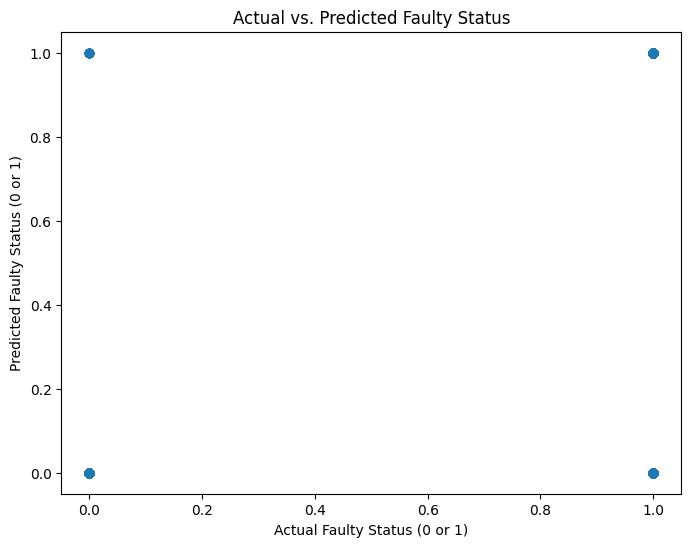

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

predictions_pd = predictions.toPandas()

plt.figure(figsize=(8, 6))
plt.scatter(predictions_pd['faulty'], predictions_pd['prediction'], alpha=0.5)
plt.xlabel('Actual Faulty Status (0 or 1)')
plt.ylabel('Predicted Faulty Status (0 or 1)')
plt.title('Actual vs. Predicted Faulty Status')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 7672 rows with features like temperature, pressure, vibration, humidity, equipment type, location, and a 'faulty' label.
*   Numerical sensor features (temperature, pressure, vibration, humidity) were successfully assembled into a feature vector for model training.
*   A Random Forest Classifier model was trained on the prepared data to predict equipment faults.
*   The trained Random Forest model showed strong performance on the evaluation data:
    *   Area under ROC: 0.9678
    *   Accuracy: 0.9758
    *   F1 Score: 0.9747
    *   Weighted Precision: 0.9754
    *   Weighted Recall: 0.9758
*   The visualization of actual vs. predicted faulty status shows that the model is largely successful in predicting the correct faulty status.
*   The project outlines how Spark can integrate with Hadoop HDFS for scalable storage and distributed processing, enabling the handling of larger datasets.

### Insights or Next Steps

*   The high evaluation metrics suggest the Random Forest model is effective for this anomaly detection task; further investigation into false positives and false negatives could refine the model.
*   To implement this in a real-world scenario, integrating with streaming platforms like Kafka for real-time data ingestion and using optimized data formats like Parquet in HDFS would be crucial for handling continuous sensor data.
